In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))
sp.init_printing()

In [2]:
import datetime
import networkx as nx
from random import shuffle

from pydivest.macro_model.integrate_equations_mean import IntegrateEquationsMean as new_model
from pydivest.macro_model.integrate_equations_test_reference import Integrate_Equations as old_model

# investment_decisions:

nopinions = [50, 50]

# Parameters:

phi, b_d = 0.4, 1.25

input_parameters = {'b_c': 1., 'phi': phi, 'tau': 1.,
                    'eps': 0.05, 'b_d': b_d, 'e': 100.,
                    'b_r0': 0.1 ** 2 * 100.,
                    'possible_opinions': [[0], [1]],
                    'xi': 1. / 8., 'beta': 0.06,
                    'L': 100., 'C': 100., 'G_0': 800.,
                    'campaign': False, 'learning': True,
                    'R_depletion': False, 'test': True,
                    'interaction': 0}

# investment_decisions
opinions = []
for i, n in enumerate(nopinions):
    opinions.append(np.full((n), i, dtype='I'))
opinions = [item for sublist in opinions for item in sublist]
shuffle(opinions)

# network:
N = sum(nopinions)
p = .2

while True:
    net = nx.erdos_renyi_graph(N, p)
    if len(list(net)) > 1:
        break
adjacency_matrix = nx.adj_matrix(net).toarray()

# investment
clean_investment = np.ones(N)
dirty_investment = np.ones(N)

init_conditions = (adjacency_matrix, opinions,
                   clean_investment, dirty_investment)

In [3]:
from pydivest.macro_model.PBP_and_MC_analytics import CalcRhs
old = CalcRhs()

In [4]:
new = new_model(*init_conditions, **input_parameters)

pi = 0.5, xi = 0.125, kappa_c = 0.375, kappa_d = 0.5
got superfluous keyword arguments
dict_keys(['possible_opinions', 'beta', 'campaign', 'learning'])
resetting parameter values to
{b_c: 1.0, b_d: 1.25, b_R: 1.0000000000000002, e: 100.0, s: 0.23, delta: 0.06, pi: 0.5, kappa_c: 0.375, kappa_d: 0.5, xi: 0.125, g_0: 8.0, p: 1.0, G_0: 800.0, P: 100.0, epsilon: 0.05, phi: 0.4, tau: 1.0, k: 9.69, N: 1.0}
sucessfull


In [5]:
sp.simplify(new.rhsPBP.subs(new.subs1) - old.rhsPBP)

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

In [7]:
#sp.simplify(new.rhsECO_3 - old.rhsECO_3)

In [8]:
#sp.simplify(new.rhs_raw - old.rhs)

In [9]:
m_old = old_model(*init_conditions, **input_parameters)
m_old.run(t_max=200)
m_old.R_depletion = True
m_old.run(t_max=600)
trj_old = m_old.get_m_trajectory()

got superfluous keyword arguments
dict_keys(['interaction'])


In [10]:
m_new = new_model(*init_conditions, **input_parameters)
m_new.run(t_max=200)
m_new.R_depletion = True
m_new.run(t_max=600)
trj_new = m_new.get_mean_trajectory()

pi = 0.5, xi = 0.125, kappa_c = 0.375, kappa_d = 0.5
got superfluous keyword arguments
dict_keys(['possible_opinions', 'beta', 'campaign', 'learning'])
resetting parameter values to
{b_c: 1.0, b_d: 1.25, b_R: 1.0000000000000002, e: 100.0, s: 0.23, delta: 0.06, pi: 0.5, kappa_c: 0.375, kappa_d: 0.5, xi: 0.125, g_0: 8.0, p: 1.0, G_0: 800.0, P: 100.0, epsilon: 0.05, phi: 0.4, tau: 1.0, k: 9.69, N: 1.0}
sucessfull
integrating equations from t=0 to t=200
integrating equations from t=200 to t=600====================] 100.6% ...mean approximation running


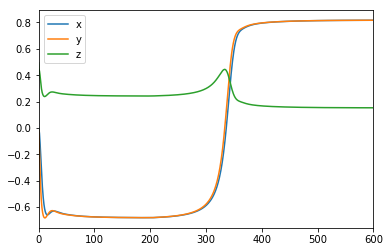

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
trj_new[['x', 'y', 'z']].plot(ax=ax)

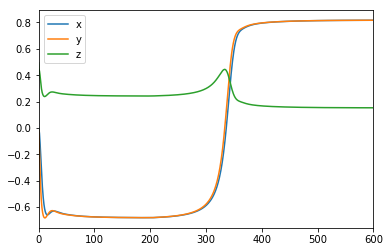

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
trj_old[['x', 'y', 'z']].plot(ax=ax)

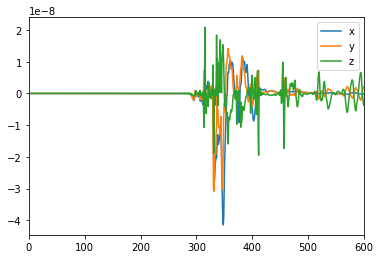

In [13]:
trj_diff = trj_new[['x', 'y', 'z']] - trj_old[['x', 'y', 'z']]
trj_abs = trj_diff.abs().sum(axis=1)
cs = trj_abs.cumsum()
trj_diff.plot()